In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

**Synthesizing BiData**

In [ ]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
c_std = 0.4
xy_pts, label = datasets.make_blobs(n_samples=n_pts, n_features=2, centers=centers, cluster_std=c_std)
x_data = torch.Tensor(xy_pts)
y_data = torch.Tensor(label.reshape(100, 1))

In [ ]:
len(xy_pts[label == 0])

50

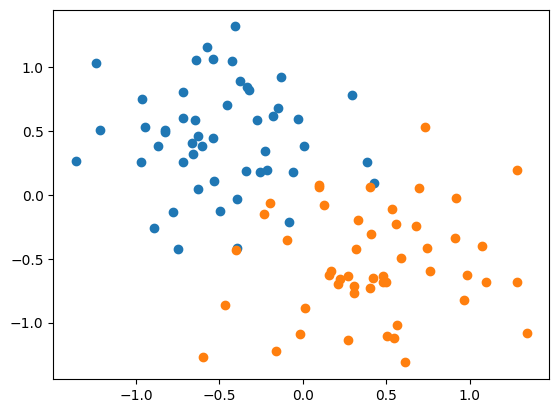

In [ ]:
def scatter_plot():
  plt.scatter(xy_pts[label == 0, 0], xy_pts[label == 0, 1])
  plt.scatter(xy_pts[label == 1, 0], xy_pts[label == 1, 1])

scatter_plot()

**Constructing Digital Neuron**

In [ ]:
class DigitalNeuron(nn.Module):
  def __init__(self, in_size, out_size):
    super().__init__()
    self.linear = nn.Linear(in_size, out_size)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))
    """
    -Logical Reasoning Layer <--> Probabilistic Reasoning
    -Prefrontal Cortex Analogy <-->  Decision Making Center
    """

  def reason(self, x):
    pred = self.forward(x)

    if pred >= 0.5:
      return 1

    else:
      return 0
    """
    -Probability Mass Function (Discrete Distribution)
    """

**Inferring Reason**

In [ ]:
model = DigitalNeuron(2, 1)

[w, b] = model.parameters()

def get_param():
  return (w[0, 0].item(), w[0, 1].item(), b[0].item())

def plot_infer(title):
    plt.title = title
    w1, w2, b1 = get_param()
    x1 = np.array([-2, 2])
    y1 = (w1*x1 + b1)/(-w2) # Decision Boundary
    scatter_plot()
    plt.plot(x1, y1, 'r')

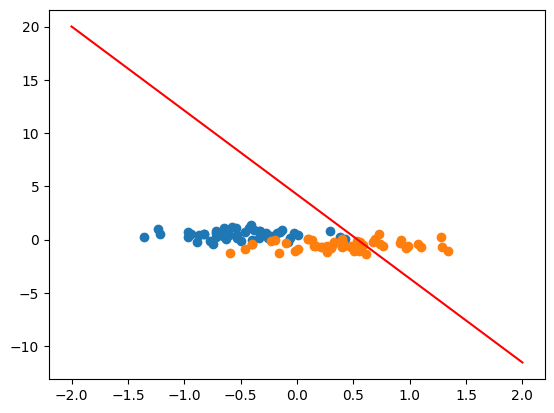

In [ ]:
plot_infer('Initial Model')

**Training & Optimizing Digital Neuron**

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss: 0.8112695813179016
epoch: 1 loss: 0.7963657379150391
epoch: 2 loss: 0.78190016746521
epoch: 3 loss: 0.7678633332252502
epoch: 4 loss: 0.7542449831962585
epoch: 5 loss: 0.7410352230072021
epoch: 6 loss: 0.728223443031311
epoch: 7 loss: 0.71579909324646
epoch: 8 loss: 0.7037519812583923
epoch: 9 loss: 0.6920711994171143
epoch: 10 loss: 0.6807462573051453
epoch: 11 loss: 0.6697665452957153
epoch: 12 loss: 0.6591216921806335
epoch: 13 loss: 0.6488012075424194
epoch: 14 loss: 0.6387948393821716
epoch: 15 loss: 0.6290925741195679
epoch: 16 loss: 0.6196843981742859
epoch: 17 loss: 0.6105605363845825
epoch: 18 loss: 0.6017115116119385
epoch: 19 loss: 0.5931280255317688
epoch: 20 loss: 0.5848008990287781
epoch: 21 loss: 0.5767214298248291
epoch: 22 loss: 0.5688808560371399
epoch: 23 loss: 0.5612708330154419
epoch: 24 loss: 0.5538833141326904
epoch: 25 loss: 0.5467104911804199
epoch: 26 loss: 0.5397446751594543
epoch: 27 loss: 0.5329785346984863
epoch: 28 loss: 0.5264049768447876


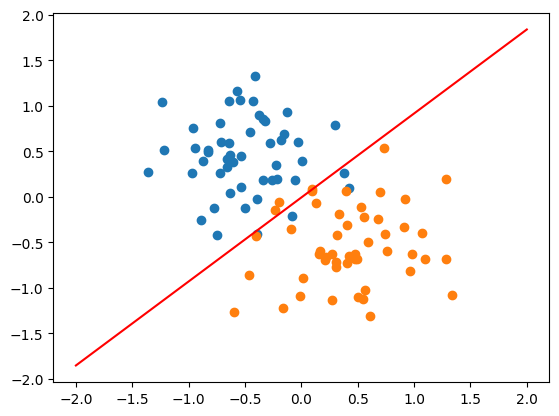

In [ ]:
plot_infer('Trained Model')

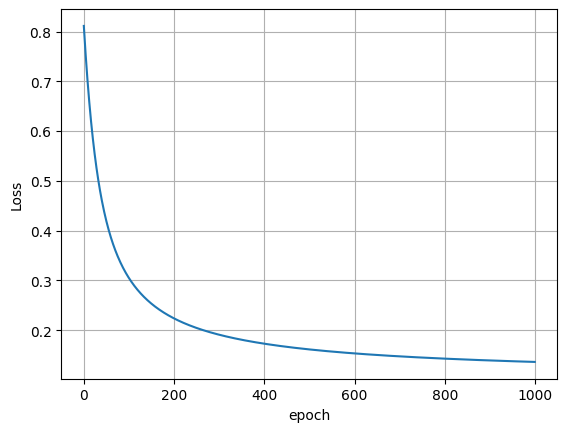

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

**Reasoning**

Red point positive probability = 1.8313616237719543e-05
Black point positive probability = 0.9999803304672241
Red point belongs in class 0
Black point belongs in class = 1


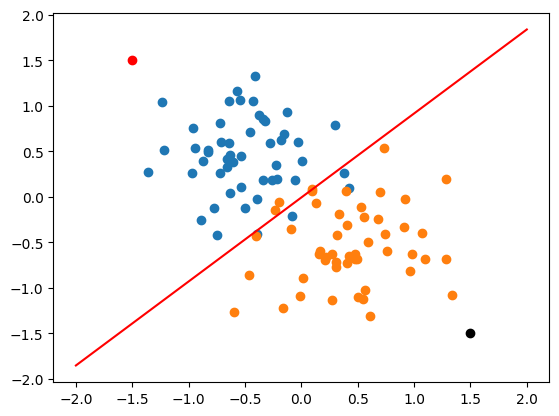

In [ ]:
observation1 = torch.Tensor([-1.5, 1.5])
observation2 = torch.Tensor([1.5, -1.5])

#Inference
reason1 = model.reason(observation1)
reason2 = model.reason(observation2)
# print(reason1, reason2)

plot_infer('Trained Model')
plt.plot(observation1[0], observation1[1], 'ro')
plt.plot(observation2[0], observation2[1], 'ko')

print("Red point positive probability = {}".format(model.forward(observation1).item()))
print("Black point positive probability = {}".format(model.forward(observation2).item()))
print("Red point belongs in class {}".format(model.reason(observation1)))
print("Black point belongs in class = {}".format(model.reason(observation2)))